In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 250).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 250).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T


In [9]:
pontos = c.T.tolist()

def distancia(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def nearest_points(pontos):
    min_dist = float('inf')     # inicaliza a distância mínima com infinito
    par = (None, None)          # par mais curto

    for i in range(len(pontos)):
        for j in range(i+1, len(pontos)):  # começa em i+1 para evitar repetições
            d = distancia(pontos[i], pontos[j])
            if d < min_dist:                # se for menor que a distância mínima anterior
                min_dist = d                # guarda o novo mínimo
                par = (i, j)                # e o respetivo par
    return par


Restam apenas dois pontos:
[[ 2.54722609  3.86833457]
 [-2.9913004  -2.58808759]]


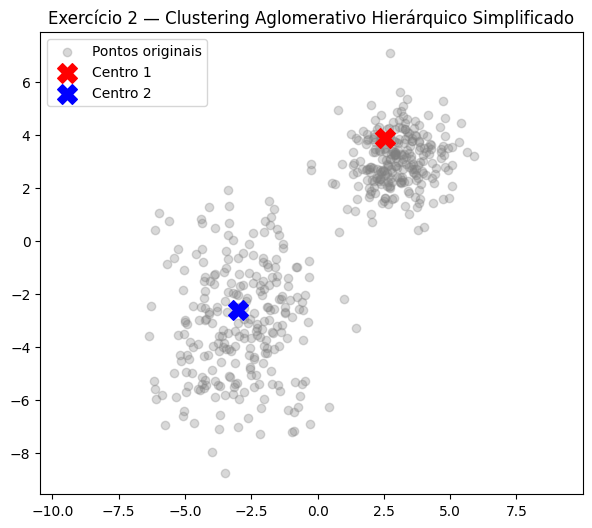

In [10]:
historico = []
while len(pontos) > 2:
    i, j = nearest_points(pontos)
    
    # calcular média dos dois pontos mais próximos
    media = [
        (pontos[i][0] + pontos[j][0]) / 2,
        (pontos[i][1] + pontos[j][1]) / 2
    ]
    
    
    # remover os dois pontos e adicionar o novo ponto médio
    pontos.pop(max(i, j))  # remover primeiro o de índice maior
    pontos.pop(min(i, j))
    pontos.append(media)

# Resultado final (dois pontos finais)
print("Restam apenas dois pontos:")
print(np.array(pontos))

# Plot
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], color='gray', alpha=0.3, label='Pontos originais')

# Mostrar os dois pontos finais
plt.scatter(pontos[0][0], pontos[0][1], color='red', marker='X', s=200, label='Centro 1')
plt.scatter(pontos[1][0], pontos[1][1], color='blue', marker='X', s=200, label='Centro 2')
plt.axis("equal")
plt.title("Exercício 2 — Clustering Aglomerativo Hierárquico Simplificado")
plt.legend()
plt.show()

Comparando com o k-means observa mos que este metodo e significativamente mais ineficiente e mais demorado durante a execuçao, mesmo utilizando menos pontos. Tambem conseguimos concluir que a precisao tambem nao é tao boa.